<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
using PyPlot
using JuMP
using Ipopt
using Gallium

include("projection.jl")
include("ipsolve.jl")
include("function.jl")

LoadError: [91mArgumentError: Module Gallium not found in current path.
Run `Pkg.add("Gallium")` to install the Gallium package.[39m

In [2]:
srand(3)

N = 20
ϵ = 0.0

# a = 0.0
# b = 0.5
a = 1*rand()-0.5
b = 1*rand()-0.5
w = 2*rand(N)-1
X = collect(linspace(0,10,N))
Y = a+b*X+w;

Z = vcat(hcat(ones(length(X)),X,Y),zeros(3)');

ITER_MAX = 100000
precision = 0.00001
# const seed = 30
itmax = 10000
α = 0.007
stability = 0.0000001

lt = size(Z)[2]-1
d1 = [ϵ; zeros(1:lt); ones(N)/N]

# x0 = ones(size(d1))

I0= collect(1:N^2+1)
# fname_tabu = vcat(repmat(["DROconstraint"],N^2),["posit"]);

In [3]:
function fname_tabu(i)
    if i == N^2 +1 
        return "posit"
    else
        return "DROconstraint"
    end
end

fname_tabu (generic function with 1 method)

In [94]:
@time theDRO = DRO_opt(Z, ϵ, N)
println("DROopt done")
thebis = normal_opt(X, Y, N)
println("MSE done")

  0.285043 seconds (396.22 k allocations: 20.161 MiB, 1.90% gc time)
DROopt done
MSE done


In [4]:
x0 = rand(size(d1))
@time xDRO = run_algo(x0, itmax, d1, fname_tabu, I0, ITER_MAX, precision, N, α, stability)
println("DROlin done")

LoadError: [91mUndefVarError: run_algo not defined[39m

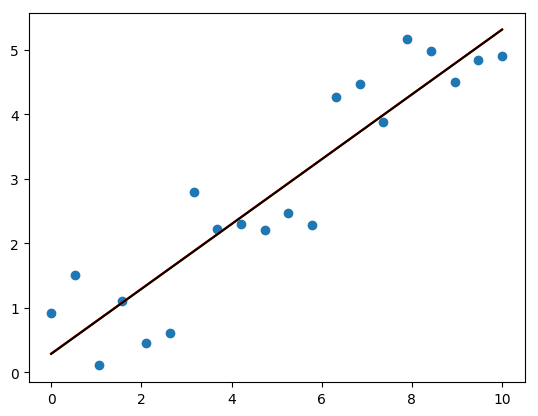

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f524df0f9b0>

In [98]:
plot(X, Y, "o")
plot(X, theDRO[1]+theDRO[2]*X, "orange")
plot(X, xDRO[2]+xDRO[3]*X, "red")
plot(X, thebis[1]+thebis[2]*X, "black")
# plot(X, a+b*X, "green")